In [1]:
#!pip install pykrx

In [2]:
import pykrx
#help(pykrx)

In [3]:
# 1. 데이터 소개
from pykrx import stock

# bond도 가능함
# from pykrx import bond

# https://github.com/sharebook-kr/pykrx

# tickers = stock.get_market_ticker_list(조회일자(YYYYmmdd) [,market=조회할 시장(KOSPI, KOSDAQ, ALL])
# name = get_market_ticker_name(심볼 [,market=조회할 시장(KOSPI, KOSDAQ, ALL])
# ohlcv = stock.stock.get_market_ohlcv(조회일자(YYYYmmdd) [,앞에 시작일을 넣었다면 종료일] [,심볼] )

# 예시
#tickers = stock.get_market_ticker_list("20220222", market="KOSPI") # 코스피 종목 리스트
#name = stock.get_market_ticker_name("005930") # 심볼 -> 기업 이름
#ohlcv = stock.get_market_ohlcv("20220222", market="KOSPI") # 특정일 코스피 종목들의 OHLCV
raw = stock.get_market_ohlcv('20221229', '20231231', '000660') # 특정기간 특정 종목의 OHLCV : 'm' 등 옵션 존재.

In [4]:
print(len(raw))
raw.head()
type(raw)

246


pandas.core.frame.DataFrame

In [5]:
# 2. 수익률 계산하기
import pandas as pd
import numpy as np
df=pd.DataFrame(raw[['종가', '등락률']])
df.head()

,종가,등락률
날짜,,
2022-12-29,75000,-1.315789
2023-01-02,75700,0.933333
2023-01-03,75600,-0.132100
2023-01-04,81000,7.142857
2023-01-05,81400,0.493827


In [6]:
df = df.rename(columns={'종가':'close', '등락률':'updown'})
df.head()

,close,updown
날짜,,
2022-12-29,75000,-1.315789
2023-01-02,75700,0.933333
2023-01-03,75600,-0.132100
2023-01-04,81000,7.142857
2023-01-05,81400,0.493827


In [7]:
df['return'] = 1 + df['updown']/100
df.tail()

,close,updown,return
날짜,,,
2023-12-21,140500,0.000000,1.000000
2023-12-22,140600,0.071174,1.000712
2023-12-26,140900,0.213371,1.002134
2023-12-27,140400,-0.354862,0.996451
2023-12-28,141500,0.783476,1.007835


In [ ]:
#df['return'] = np.log(df['close']/df['close'].shift(1)) 확인

In [8]:
# 3. 12월 29일 종가를 기준으로 향후 251일 이후의 수익률 부트스트래핑
def geomean(lst) :
    return np.exp(np.mean(np.log(lst)))

rlst = []
for i in range(0,251) : 
    sn = np.random.randint(1, 246)
    rlst.append(df['return'][sn])

# 불확실성이 실현된!

C:\Users\Na\AppData\Local\Temp\ipykernel_42632\1526152599.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rlst.append(df['return'][sn])


In [95]:
# 4. 각 행의 값을 직전의 종가에 곱하여 251일의 에측 종가를 만들기

In [96]:
fclose = [75000]
for i in range(0, len(rlst)) :
    fclose.append(fclose[i]*rlst[i])
fclose[-1]

119344.6064527661

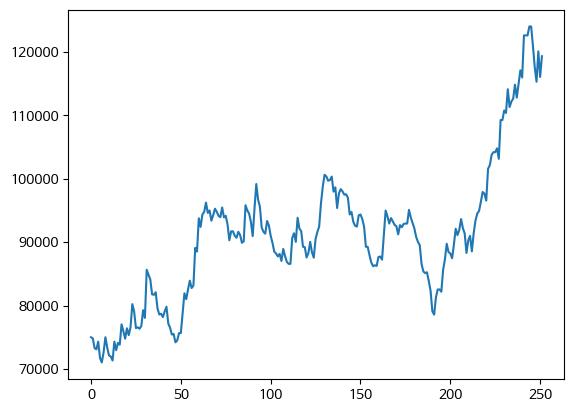

In [98]:
# 5. 251일의 주가 흐름을 line plot으로 그려보기
import matplotlib as plt
plt.pyplot.plot(fclose)

In [ ]:
# 6. 해당 시행을 1000번, 10000번 반복하여 251일째 (즉, 대략적인 영업일 기준 2023년 12월 31일)의 예측 종가를 히스토그램으로 그려보기 /

In [102]:
##100회

lst_100 = []
for j in range(0, 100) :
    rlst = []
    for i in range(0,251) : 
        sn = np.random.randint(1, 246)
        rlst.append(df['return'][sn])
    fclose = [75000]
    for i in range(0, len(rlst)) :
        fclose.append(fclose[i]*rlst[i])
    lst_100.append(fclose[-1])

C:\Users\Na\AppData\Local\Temp\ipykernel_47148\1806572603.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rlst.append(df['return'][sn])


(array([ 6., 11., 31., 24., 13.,  9.,  5.,  0.,  0.,  1.]),
 array([ 51307.98129874,  80996.19521466, 110684.40913058, 140372.6230465 ,
        170060.83696243, 199749.05087835, 229437.26479427, 259125.47871019,
        288813.69262612, 318501.90654204, 348190.12045796]),
 <BarContainer object of 10 artists>)

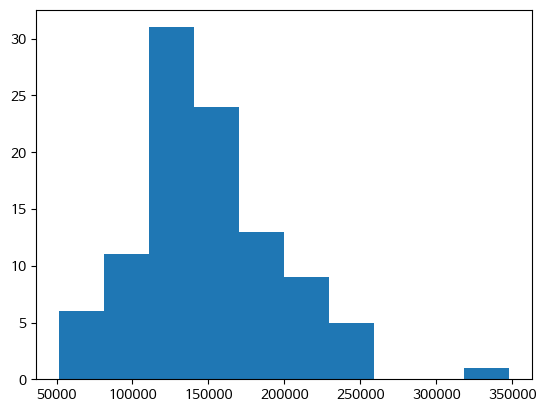

In [103]:
plt.pyplot.hist(lst_100)

In [104]:
##1000회

lst_1000 = []
for j in range(0, 1000) :
    rlst = []
    for i in range(0,251) : 
        sn = np.random.randint(1, 246)
        rlst.append(df['return'][sn])
    fclose = [75000]
    for i in range(0, len(rlst)) :
        fclose.append(fclose[i]*rlst[i])
    lst_1000.append(fclose[-1])

C:\Users\Na\AppData\Local\Temp\ipykernel_47148\1788237517.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rlst.append(df['return'][sn])


(array([179., 416., 254.,  99.,  39.,  12.,   0.,   0.,   0.,   1.]),
 array([ 54825.93963989, 105197.12598661, 155568.31233333, 205939.49868005,
        256310.68502677, 306681.87137349, 357053.05772021, 407424.24406693,
        457795.43041365, 508166.61676037, 558537.80310709]),
 <BarContainer object of 10 artists>)

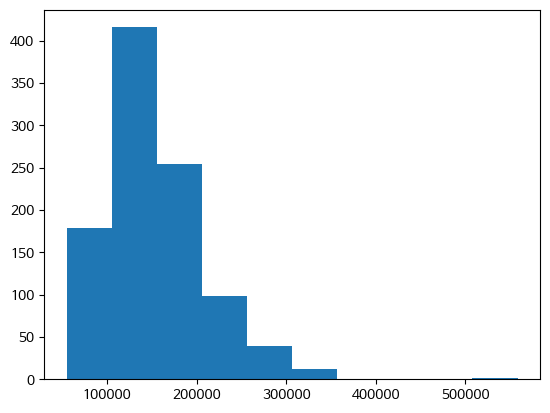

In [105]:
plt.pyplot.hist(lst_1000)

In [ ]:
# 기타 지표 수집법 (다만, 이 지표는 아직까지 검증이 좀 필요함)
fs = stock.get_market_fundamental("20220101", "20221231", "005930")
fs.tail()
# BPS: Book value Per Share : 주당순자산
# PER: Price Earning Ratio : 주가수익비율
# PBR: Price on Book-value Ratio : 주가순자산비율
# EPS: Earning Per Share : 주당순이익
# DIV: Dividend : 배당수익률
# DPS: Dividend Per Share : 주당배당금

In [ ]:
# 
df = stock.get_market_trading_value_by_date("20220101", "20221231", "005930", on="매수")
df.tail()

In [ ]:
# 기타 국내외 주식정보 수집
import FinanceDataReader as fdr

# fdr.DataReader(주식 종목 [, 시작일(YYYY-mm-dd)] [,종료일(YYYY-mm-dd)])
# fdr.StockListing(거래소이름("SSE", "SZSE", ...))

samsung = fdr.DataReader("005930")
samsung_period = fdr.DataReader("005930", "2022-01-01", "2022-12-31")
samsung_year = fdr.DataReader("005930", "2021")

# 뉴욕거래소 전체
NYSE_df = fdr.StockListing('NYSE') 

In [ ]:
NYSE_df.tail()

In [ ]:
samsung_period.head()

In [ ]:
# yahoo finance 사용 - 해외특화
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
# yf의 메소드를 재정의해줌(이 부분이 필요!)

# df = pdr.get_data_yahoo(주식 종목(한국주식의 경우 ".KS") [, 시작일(YYYY-mm-dd)] [,종료일(YYYY-mm-dd)])

# 예시
df = pdr.get_data_yahoo("AAPL", "2022-01-01", "2022-12-31")

df